In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from decimal import *
import math

In [12]:
rawdata_names = """2-FSK 2,4		2-FSK 20		2-FSK 34		GFSK 2,4		GFSK 20		GFSK 34		MSK 2,4		MSK 34		OOK 2,4		OOK 20		OOK 34""".split("\t\t")

rawdata = """
-80	0	-79	0	-79	0	-78,25	0	-79	0	-79	0	-78	0	-77	0	-75	0,02419354839	-79	0	-79	0
-84	0	-80,75	0	-84	0	-83,75	0	-84	0	-81,25	0	-81	0	-81	0	-79,75	0,004032258065	-81,25	0	-81,75	0
-90	0	-85,5	0	-88	0	-87,5	0	-88	0	-85,75	0	-86	0	-85	0	-84,25	0,008064516129	-85,5	0	-86	0
-93	0	-89,75	0	-92	0	-91	0	-92	0	-89,75	0	-90	0,03225806452	-88	0	-90,75	0,04435483871	-89,5	0	-90	0
-97	0	-94,25	0	-97	0	-93,75	0	-97	0	-94,25	0	-94	0,06451612903	-98	0	-94,75	0,03225806452	-93,75	0,2620967742	-94	0,4717741935
-101	0	-100,75	0,6008064516	-100	0,1451612903	-96,5	0	-100	0,1166666667	-99,5	0,5040322581	-100	0,2419354839	-100	0,1612903226	-100	0,9637096774	-101	1	-100	1
-105	0,01612903226	-102,75	0,7137096774	-104,75	0,6129032258	-101	0,2540322581	-105	0,4838709677	-103	1	-106	1	-104	0,4838709677	-105	1	-104	1	-103	1
-107	0,4838709677	-105,25	1	-106	1	-108	1	-107	1	-105	1	-106	1	-108	1	-106	1	-103	1	-102	1
""".replace(',', '.').split()
rawdata = np.array(rawdata, dtype='f8').reshape(-1, 22).transpose()

polyfits = np.empty(11, dtype=object)
for i in range(11):
    polyfits[i] = np.polynomial.Polynomial.fit(rawdata[2*i], rawdata[2*i+1], 6).linspace(n=100, domain=[rawdata[2*i][0], rawdata[2*i][-1]])
    print(polyfits[i])

(array([ -80.        ,  -80.27272727,  -80.54545455,  -80.81818182,
        -81.09090909,  -81.36363636,  -81.63636364,  -81.90909091,
        -82.18181818,  -82.45454545,  -82.72727273,  -83.        ,
        -83.27272727,  -83.54545455,  -83.81818182,  -84.09090909,
        -84.36363636,  -84.63636364,  -84.90909091,  -85.18181818,
        -85.45454545,  -85.72727273,  -86.        ,  -86.27272727,
        -86.54545455,  -86.81818182,  -87.09090909,  -87.36363636,
        -87.63636364,  -87.90909091,  -88.18181818,  -88.45454545,
        -88.72727273,  -89.        ,  -89.27272727,  -89.54545455,
        -89.81818182,  -90.09090909,  -90.36363636,  -90.63636364,
        -90.90909091,  -91.18181818,  -91.45454545,  -91.72727273,
        -92.        ,  -92.27272727,  -92.54545455,  -92.81818182,
        -93.09090909,  -93.36363636,  -93.63636364,  -93.90909091,
        -94.18181818,  -94.45454545,  -94.72727273,  -95.        ,
        -95.27272727,  -95.54545455,  -95.81818182,  -96.0909

In [13]:
rawdata_names[-1]

'OOK 34'

In [14]:
markers = "vo<^1P>32p4*"
len(markers)

12

[(array([1.00e-08, 9.40e-09, 8.84e-09, 8.30e-09, 7.79e-09, 7.32e-09,
        6.88e-09, 6.46e-09, 6.06e-09, 5.69e-09, 5.35e-09, 5.02e-09,
        4.71e-09, 4.43e-09, 4.16e-09, 3.90e-09, 3.67e-09, 3.45e-09,
        3.24e-09, 3.04e-09, 2.86e-09, 2.68e-09, 2.52e-09, 2.37e-09,
        2.22e-09, 2.09e-09, 1.96e-09, 1.84e-09, 1.73e-09, 1.63e-09,
        1.53e-09, 1.43e-09, 1.35e-09, 1.26e-09, 1.19e-09, 1.12e-09,
        1.05e-09, 9.80e-10, 9.21e-10, 8.65e-10, 8.13e-10, 7.63e-10,
        7.17e-10, 6.73e-10, 6.33e-10, 5.93e-10, 5.58e-10, 5.24e-10,
        4.91e-10, 4.62e-10, 4.34e-10, 4.08e-10, 3.82e-10, 3.59e-10,
        3.38e-10, 3.17e-10, 2.98e-10, 2.80e-10, 2.63e-10, 2.47e-10,
        2.32e-10, 2.18e-10, 2.05e-10, 1.92e-10, 1.80e-10, 1.70e-10,
        1.59e-10, 1.49e-10, 1.40e-10, 1.32e-10, 1.24e-10, 1.16e-10,
        1.09e-10, 1.03e-10, 9.60e-11, 9.02e-11, 8.48e-11, 7.97e-11,
        7.47e-11, 7.02e-11, 6.60e-11, 6.19e-11, 5.81e-11, 5.46e-11,
        5.13e-11, 4.81e-11, 4.52e-11, 4.25e-11,

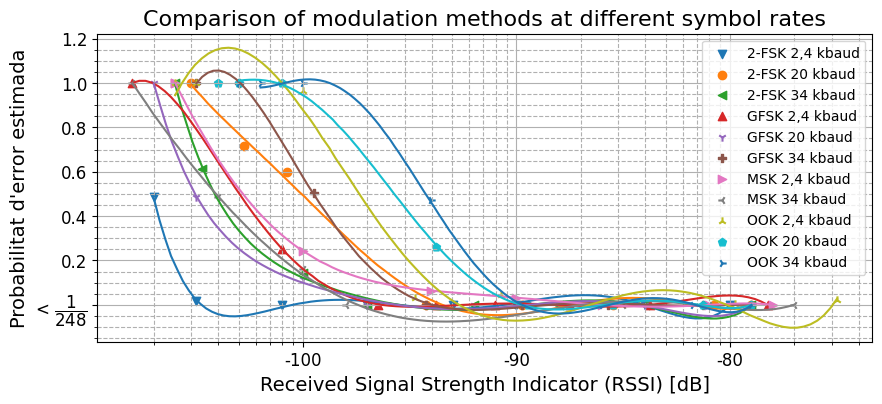

In [15]:
fig, ax = plt.subplots(figsize=(10, 4))
#fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

linealdata = rawdata.copy()
linealfit = polyfits.copy()


def decibel_fmt(x,pos=None):
    if x==0:
        return "-inf"
    else:
        return '{:.0f}'.format(10*np.log10(np.sign(x)*x))

def minimum_p(x,pos=None):
    if x==0:
        return r'< $\dfrac{1}{248}$'
    else:
        return '{:.1f}'.format(x)

context = Context(prec=3, rounding=ROUND_UP)
for i in range(11):
    for j in range(rawdata[i].size):
        decimal_part = context.create_decimal_from_float(rawdata[2*i][j]/10-math.floor(rawdata[2*i][j]/10))
        missing_exp = context.create_decimal_from_float(float(Decimal("10")**decimal_part))
        linealdata[2*i][j] = float(Decimal("1e" + str(math.floor(rawdata[2*i][j]/10)))*missing_exp)
        #print(math.floor(math.log10(abs(float(linealdata[2*i][j])))))
        #print(linealdata[2*i][j], linealdata[2*i][j], rawdata[2*i][j], decimal_part, context.create_decimal_from_float(float(Decimal("10")**decimal_part)))
    for k in range(linealfit[i][0].size):
        decimal_part = context.create_decimal_from_float(linealfit[i][0][k]/10-math.floor(linealfit[i][0][k]/10))
        missing_exp = context.create_decimal_from_float(float(Decimal("10")**decimal_part))
        linealfit[i][0][k] = float(Decimal("1e" + str(math.floor(linealfit[i][0][k]/10)))*missing_exp)

print(polyfits)

for i in range(6):
    #ax.plot(rawdata[2*i], rawdata[2*i + 1], label=rawdata_names[i], marker=markers[i])
    ax.scatter(linealdata[2*i], rawdata[2*i+1], label=rawdata_names[i] + " kbaud", marker=markers[i])
    ax.plot(linealfit[i][0], linealfit[i][1])

for i in range(5):
    j = i + 6
    #ax.plot(rawdata[2*i], rawdata[2*i + 1], label=rawdata_names[i], marker=markers[i])
    ax.scatter(linealdata[2*j], rawdata[2*j+1], label=rawdata_names[j] + " kbaud", marker=markers[j])
    ax.plot(linealfit[j][0], linealfit[j][1])

ax.set_title("Comparison of modulation methods at different symbol rates", fontsize=16)

ax.set_xlabel("Received Signal Strength Indicator (RSSI) [dB]", fontsize=14)
#ax.set_ylabel("Probabilitat d'error estimada")

#for ax in (ax1, ax2)
ax.set_ylabel("Probabilitat d'error estimada", fontsize=14)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

ax.minorticks_on()
ax.grid(True, which="minor", axis="y", linestyle="--")
ax.grid(True, which="minor", axis="x", linestyle="--")

ax.set_xscale("log")

ax.xaxis.set_major_formatter(mtick.FuncFormatter(decibel_fmt))
ax.yaxis.set_major_formatter(mtick.FuncFormatter(minimum_p))

ax.set_ylim(ax.get_ylim())
ax.set_xlim(ax.get_xlim())

ax.legend()
ax.grid()
fig.savefig('modulation_comparison.png', dpi=400)
fig.savefig("modulation_comparison.pdf", bbox_inches="tight")